Importing The Dependencies

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics 
import keras.datasets 

Importing the Boston House Price Dataset

In [20]:

# Load data
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# Combine train and test sets
X = np.concatenate([x_train, x_test], axis=0)
y = np.concatenate([y_train, y_test], axis=0)

# Feature names from the original dataset
feature_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
]

# Create DataFrame
house_price_dataframe = pd.DataFrame(X, columns=feature_names)
house_price_dataframe['Price'] = y  #Price is the target (house price)

# Display first few rows
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


In [ ]:
#statistical measures of the dataframe
house_price_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
#Checking the number of rows and columnss
house_price_dataframe.shape

(506, 14)

In [21]:
# Check for missing values
house_price_dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

Understanding the correlation between the various features in the dataset

1.Positive Correlation


2.Negative Correlation

In [22]:
correlation = house_price_dataframe.corr()

<Axes: >

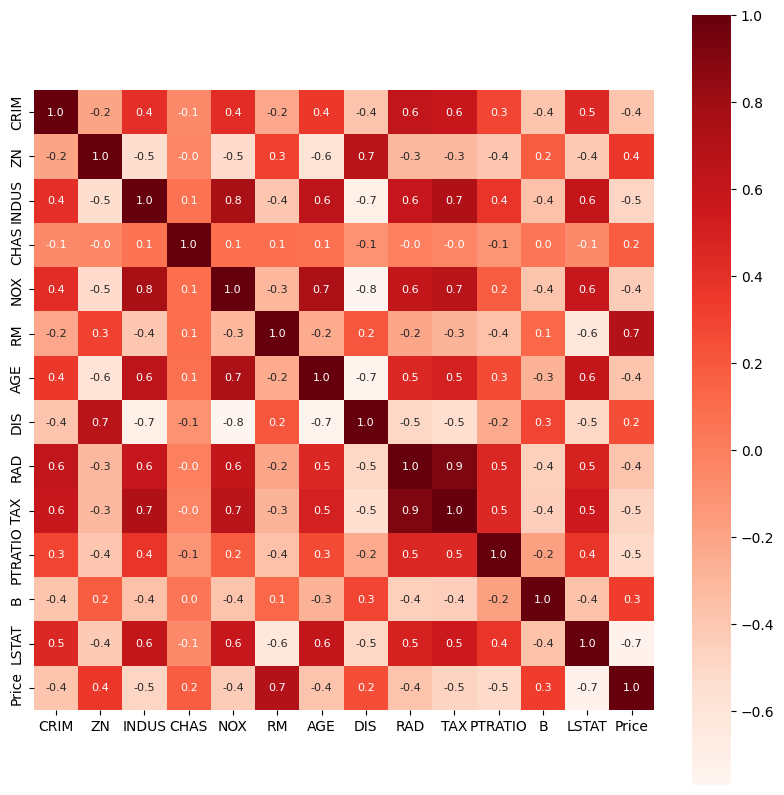

In [24]:
# construction of heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap="Reds")

Splitting the data and target

In [25]:
X = house_price_dataframe.drop(['Price'],axis=1)
Y = house_price_dataframe['Price']

In [26]:
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0    1.23247   0.0   8.14   0.0  0.538  6.142   91.7  3.9769   4.0  307.0   
1    0.02177  82.5   2.03   0.0  0.415  7.610   15.7  6.2700   2.0  348.0   
2    4.89822   0.0  18.10   0.0  0.631  4.970  100.0  1.3325  24.0  666.0   
3    0.03961   0.0   5.19   0.0  0.515  6.037   34.5  5.9853   5.0  224.0   
4    3.69311   0.0  18.10   0.0  0.713  6.376   88.4  2.5671  24.0  666.0   
..       ...   ...    ...   ...    ...    ...    ...     ...   ...    ...   
501  3.47428   0.0  18.10   1.0  0.718  8.780   82.9  1.9047  24.0  666.0   
502  0.07896   0.0  12.83   0.0  0.437  6.273    6.0  4.2515   5.0  398.0   
503  1.83377   0.0  19.58   1.0  0.605  7.802   98.2  2.0407   5.0  403.0   
504  0.35809   0.0   6.20   1.0  0.507  6.951   88.5  2.8617   8.0  307.0   
505  2.92400   0.0  19.58   0.0  0.605  6.101   93.0  2.2834   5.0  403.0   

     PTRATIO       B  LSTAT  
0       21.0  396.90  18.72  
1       14.7  3

Splitting the data into train and test data

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [ ]:
print(X.shape, x_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


Model Training

XGBoost Regressor

In [37]:
# Loading the model
model = XGBRegressor()

In [38]:
# training model with X_train
model.fit(X_train,Y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


Model Evaluation

Prediction on training data

In [39]:
# Accuracy for prediction on train data
train_data_prediction = model.predict(X_train)

In [40]:
print(train_data_prediction)

[49.993927  13.072456   7.2075486 49.99992   13.299319  14.507181
 24.575224  16.219366  18.497911  15.19115   21.695713  25.202492
 23.067232  16.105665  18.95945   24.258081  24.79545   18.905933
 19.035084  19.310476  20.494467  20.084326   8.306206  21.386923
 15.594283  22.793045  13.8183    22.325651  16.742104  16.201044
 24.68944   23.412577   6.316599  12.265153  16.393602  15.399943
 17.80544   27.895103  22.014202  14.0876045 19.330194  35.39649
 34.942238  22.63638   23.097239  22.290731  37.591133  12.068568
 23.912971  22.506811  43.118046  23.811686  19.600588  22.68877
 20.609547  18.693487  20.99799   22.216192  27.885345  36.142025
 17.526463  34.545216  13.831402  18.804514  29.030943  24.303747
 19.496738  13.305216  38.70587   17.53172   18.362246  33.32152
 23.906416  21.09235   22.183592  35.206177  11.765803  27.07109
 23.498821  23.742968  18.97966   44.810043  22.399252  20.602116
 23.293701   9.517485  21.416626  14.888305  18.609732  19.911299
 21.789764   7

In [41]:
# R squared error
score_1 = metrics.r2_score(Y_train,train_data_prediction)

# Mean Absolute Error
s2 = metrics.mean_absolute_error(Y_train,train_data_prediction)

print("R squared error : ", score_1)
print("Mean Absolute Error : ",s2)

R squared error :  0.9999937769436482
Mean Absolute Error :  0.01626581673574912


Visualizing the actual Prices and Predicted prices

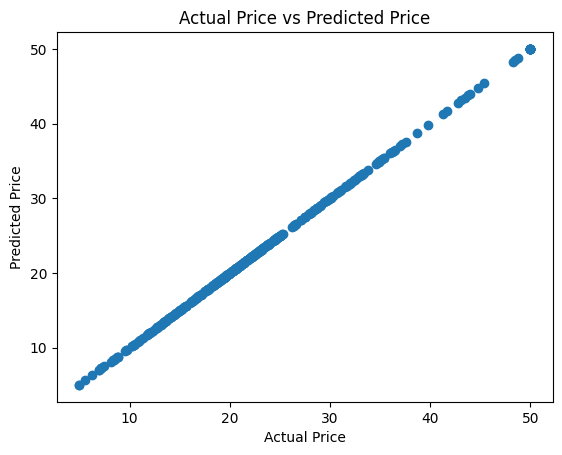

In [42]:
plt.scatter(Y_train,train_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [46]:
test_data_prediction = model.predict(X_test)

In [47]:
print(test_data_prediction)

[22.470373 26.231419 20.570663 29.105556 18.491488 20.789728 21.818695
 49.10978  27.902111 16.572424 17.57507  22.118063 10.171631 27.051535
 24.420633 47.463932 12.54777   9.194641 18.713509 45.04084  18.845592
 31.154537 24.03213  41.843304 24.505459 21.711596 31.473516 20.981878
 23.354048 30.09597  20.677942 16.419641 34.100803 14.719195 29.548243
 25.270197 16.570526 23.923618  9.25425  15.535017 15.916968 15.956134
 11.773625 17.048721 21.647696 19.130857 22.510355 19.331837 34.799515
 19.221651 13.807674 20.230785 13.650961 16.067307 29.802488 18.387259
 32.0878   19.66189  19.17737  24.160143 11.982391 23.40058  39.705524
 20.215181 36.116344 46.319138 24.550898 20.80615  14.84542  15.615613
 18.184978 26.059074 24.0187   21.489023 14.128676 25.98882  24.45002
 35.579247 14.74234  19.787594 15.131276 19.90535  22.655985 24.284319
 30.20847  15.663831 20.096754 19.487595 19.149027 13.542666 17.060307
 15.054598 18.430502 20.353481 20.034374 17.349976 25.22635  25.716513
 19.722

In [48]:
# R squared error
score_1 = metrics.r2_score(Y_test,test_data_prediction)

# Mean Absolute Error
s2 = metrics.mean_absolute_error(Y_test,test_data_prediction)

print("R squared error : ", score_1)
print("Mean Absolute Error : ",s2)

R squared error :  0.899821424516021
Mean Absolute Error :  2.0055546031278717


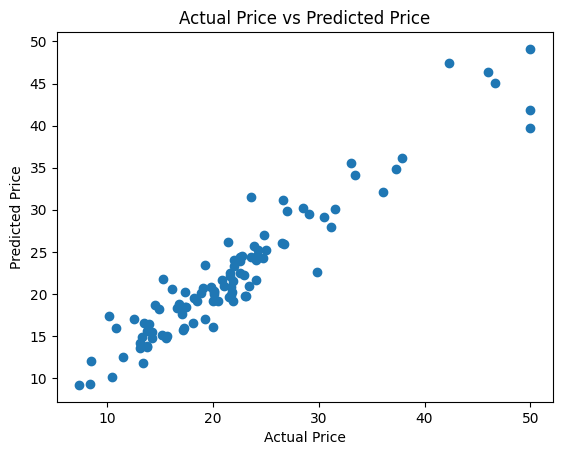

In [49]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()